# Lecture 23

## 9.5: Module 9 Notebook 5

In [1]:
from datascience import *
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
# We'll define a new function that plots the true line, and the regression line so that we can compare them
def draw_and_compare(true_slope, true_int, sample_size):
    x = np.random.normal(50, 5, sample_size)
    xlims = np.array([np.min(x), np.max(x)])
    errors = np.random.normal(0, 6, sample_size)
    y = (true_slope * x + true_int) + errors
    sample = Table().with_columns('x', x, 'y', y)

    sample.scatter('x', 'y')
    plots.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    plots.title('True Line, and Points Created')

    sample.scatter('x', 'y')
    plots.title('What We Get to See')

    sample.scatter('x', 'y', fit_line=True)
    plots.title('Regression Line: Estimate of True Line')

    sample.scatter('x', 'y', fit_line=True)
    plots.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    plots.title("Regression Line and True Line")

## Linear regression - previously defined functions

In [3]:
def standard_units(arr):
    return (arr - np.average(arr))/np.std(arr)

def correlation(t, x, y):
    x_standard = standard_units(t.column(x))
    y_standard = standard_units(t.column(y))
    return np.average(x_standard * y_standard)

def slope(t, x, y):
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def intercept(t, x, y):
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

def fitted_values(t, x, y):
    """Return an array of the regression estimates at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

def residuals(t, x, y):
    predictions = fitted_values(t, x, y)
    return t.column(y) - predictions

In [4]:
def add_regression_to_table(t, x, y):
    """ Returns a new table with 'Fitted value' and 'Residual' columns added """
    t_with_extra_cols = t.with_columns(
        'Fitted value', fitted_values(t, x, y),
        'Residual', residuals(t, x, y)
    )
    return t_with_extra_cols

## Regression Model ##

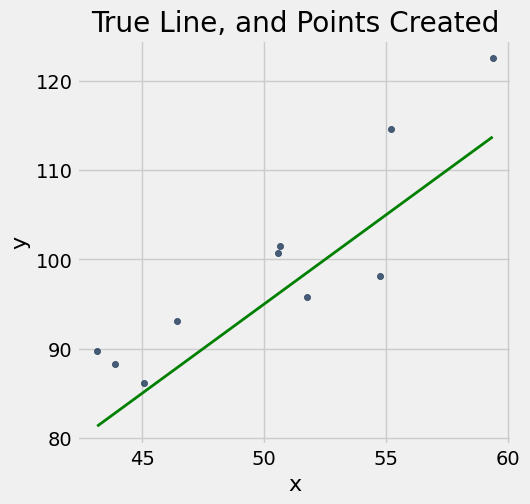

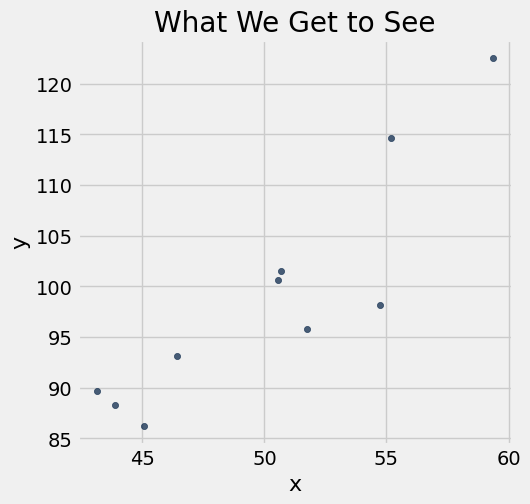

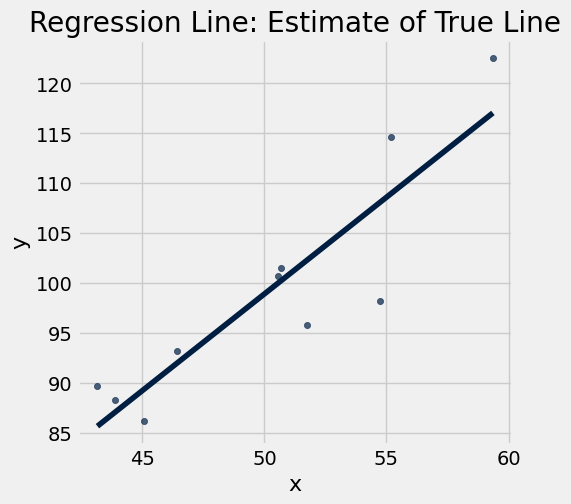

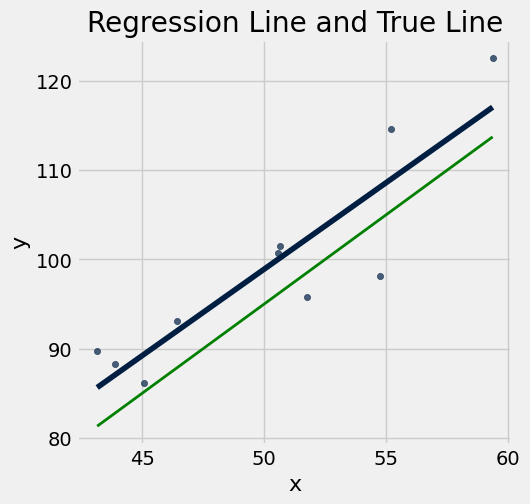

In [5]:
# Let's run some simulations to see 
# how close the regression line is to the true line. 

# The first plot shows how the scatter plot is generated from the true line. 
# The second shows the scatter plot that we see. 
# The third shows the regression line through the plot. 
# The fourth shows both the regression line and the true line.


draw_and_compare(2, -5, 10) # for 10 points

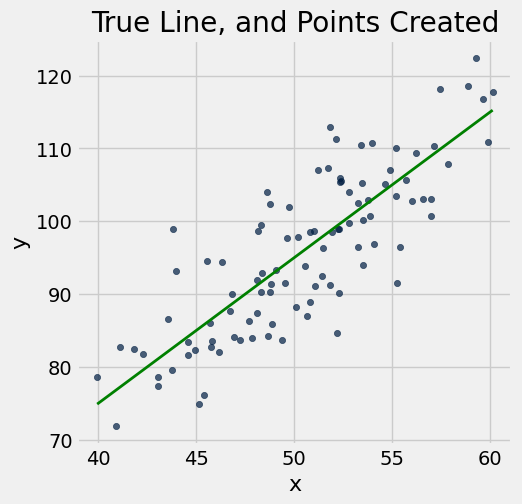

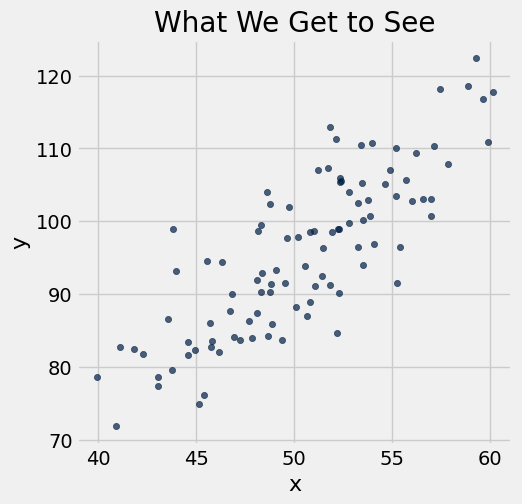

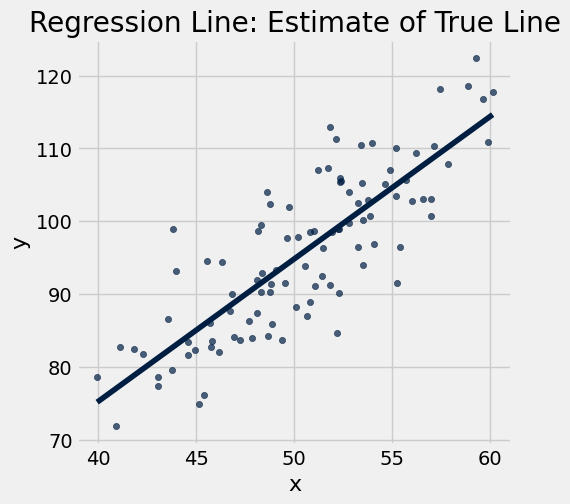

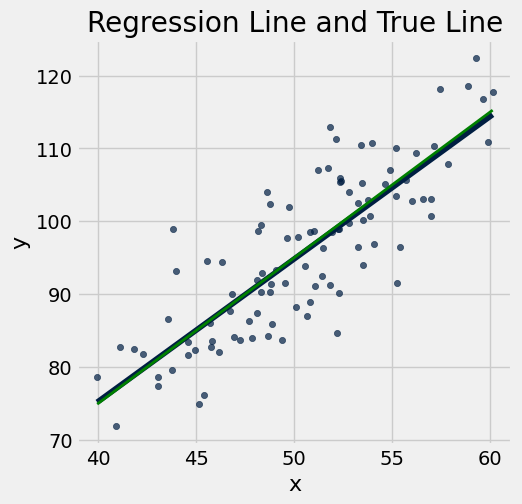

In [6]:
draw_and_compare(2, -5, 100) # same as above, but for 100 points

In [ ]:
# Because all the points are generated according to the model, 
# we see that the regression line is a good estimate of 
# the true line if the sample size is moderately large.

# In reality, of course, we will never see the true line. 
# What the simulation shows that if the regression model 
# looks plausible, and if we have a large sample, 
# then the regression line is a good approximation to the true line.

## Prediction ##

In [7]:
births = Table.read_table('baby.csv')
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


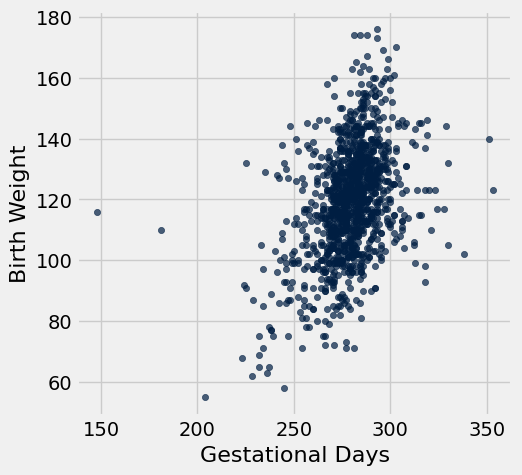

In [8]:
births.scatter('Gestational Days', 'Birth Weight')

In [9]:
births = births.where('Gestational Days', are.between(240, 320)) # range where we have a large number of observations

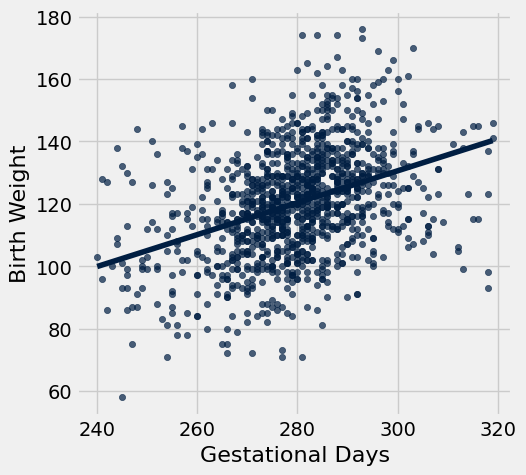

In [10]:
births.scatter('Gestational Days', 'Birth Weight', fit_line=True)

In [11]:
def prediction_at(t, x, y, x_value):
    '''
    t - table
    x - label of x column
    y - label of y column
    x_value - the x value for which we want to predict y
    '''
    return slope(t, x, y) * x_value + intercept(t, x, y)

In [12]:
prediction_at_300 = prediction_at(births, 'Gestational Days', 'Birth Weight', 300)
prediction_at_300

130.53859795467929

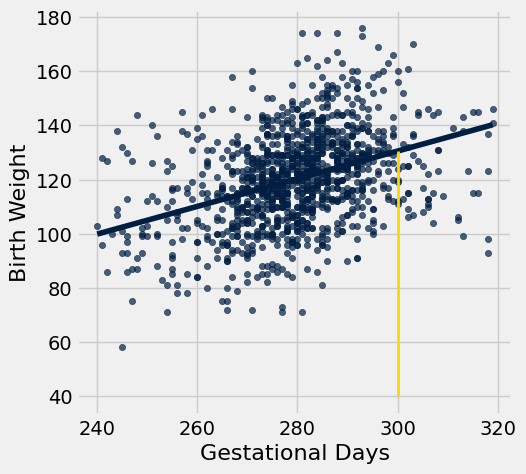

In [13]:
x = 300
births.scatter('Gestational Days', 'Birth Weight', fit_line=True)
plots.plot([x, x], [40, prediction_at_300], color='gold', lw=2);

In [ ]:
# The height of the point where the gold line hits 
# the regression line is the fitted value at 300 gestational days.

# The fitted value at 300 gestational days is about 130.5 ounces. 
# In other words, for a pregnancy that has a duration of 300 gestational days, 
# our estimate for the baby's weight is about 130.5 ounces.

## Prediction Variability and Boostrapping

In [ ]:
# Question is, if we had a different data sample,
# would a prediction of the baby's weight for a 
# gestation period of 300 days be different? 

# Answer: possibly

# so? how do we measure how different it could have been?
# Answer: confidence intervals on the predictions

# where do we get other samples to use to generate new predictions?
# Answer: boostrap!

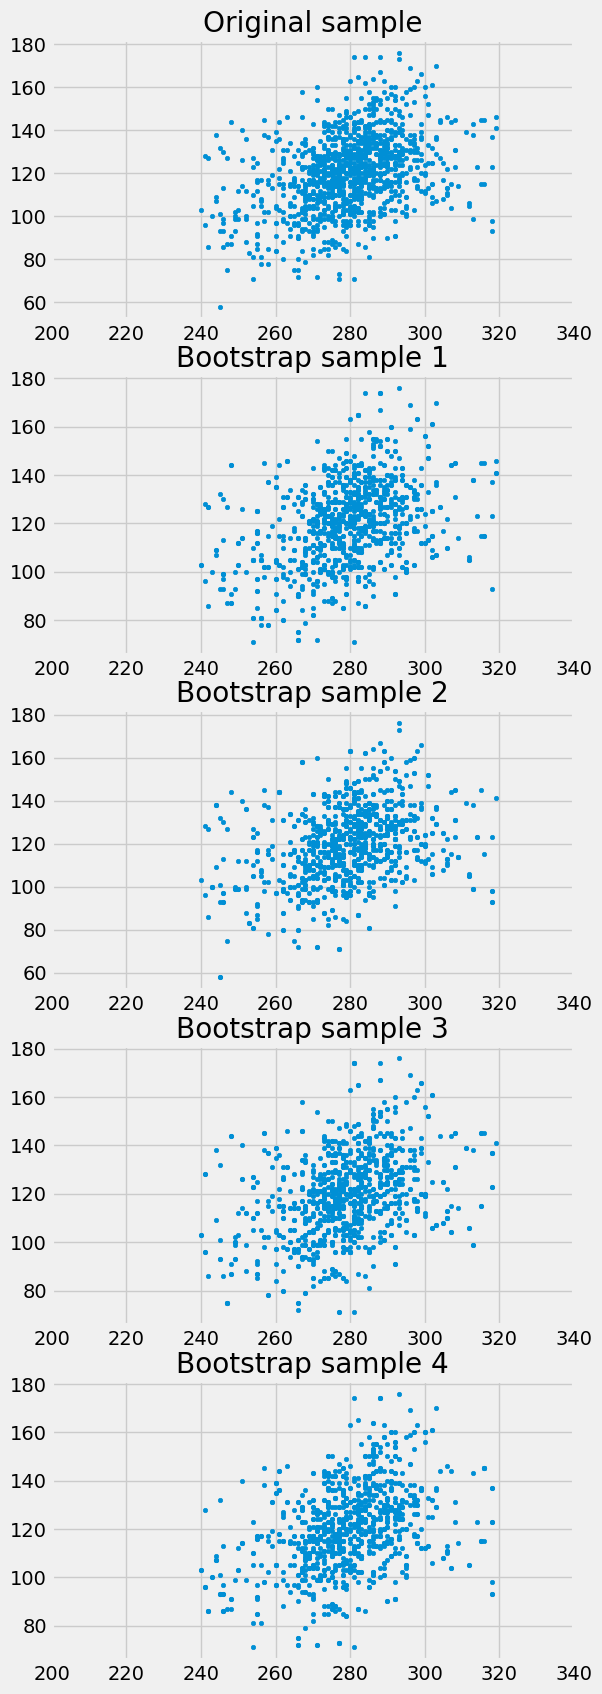

In [14]:
# This cell, draws scatter plots of 5 samples
# The original dataset i.e., original sample
# And 4 boostrap samples, that are resamples of the original sample 
# Remember, boostrap samples 
    # 1. the same number of items as the original sample, 
    # 2. at random, and with replacement, 
# from the original sample

plots.figure(figsize=(6, 20))
plots.subplot(5, 1, 1)
plots.scatter(births[1], births[0], s=10)
plots.xlim([200, 340])
plots.title('Original sample')

for i in np.arange(1, 5, 1):
    plots.subplot(5,1,i+1)
    rep = births.sample()
    plots.scatter(rep[1], rep[0], s=10)
    plots.xlim([200, 340])
    plots.title('Bootstrap sample '+str(i))

In [ ]:
# First observation: the resamples (bootstrap samples 1-4),
# are in general a little more sparse than the original. 
# Because some of the original points do not get selected in the samples.

Predicted y from bootstrap sample was 129.768515251
Predicted y from bootstrap sample was 131.360718851
Predicted y from bootstrap sample was 130.565678618
Predicted y from bootstrap sample was 129.635046723


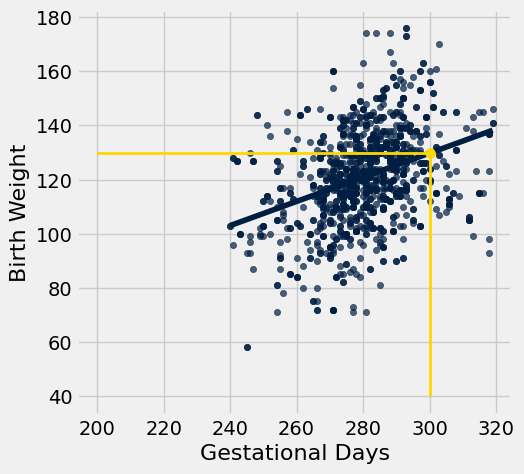

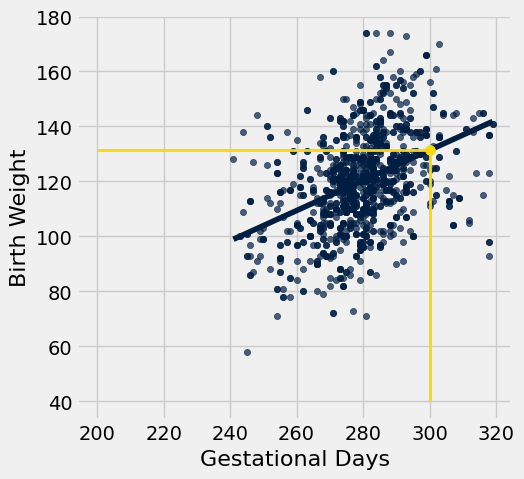

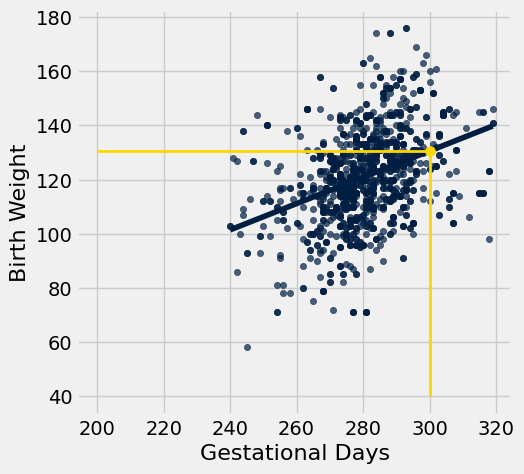

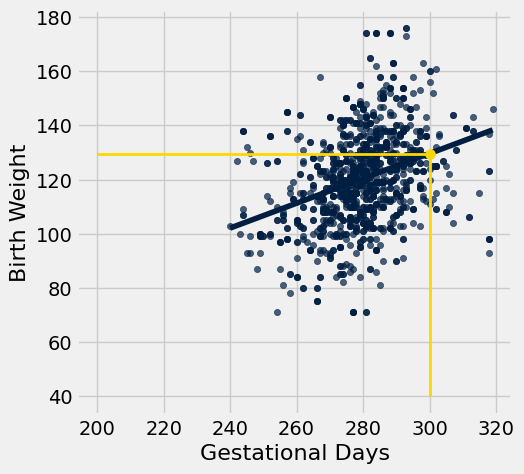

In [15]:
# In this cell, we generate 4 bootstrap samples,
# and in each, predict the birth weight of the baby
# at the 300-day gestation period

for i in np.arange(4):
    resample = births.sample()
    predicted_y = prediction_at(resample, 'Gestational Days', 'Birth Weight', 300)
    print('Predicted y from bootstrap sample was', predicted_y)
    resample.scatter('Gestational Days', 'Birth Weight', fit_line=True)
    plots.scatter(300, predicted_y, color='gold', s=50, zorder=3);
    plots.plot([x, x], [40, predicted_y], color='gold', lw=2);
    plots.plot([200, x], [predicted_y, predicted_y], color='gold', lw=2);

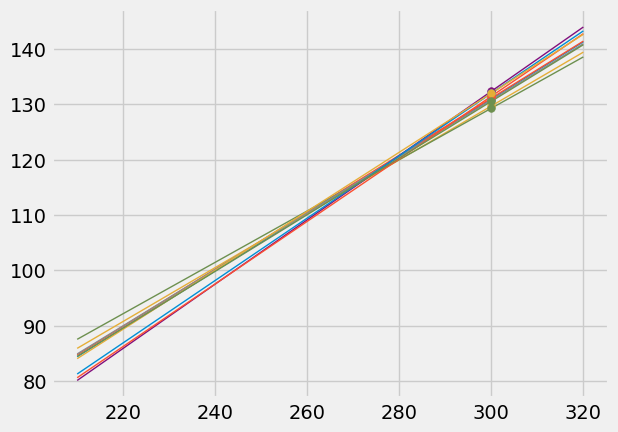

In [16]:
# Let's:
# 1. generate 10 bootstrap samples, 
# 2. compute the slope and intercept for the regression line of the boostrap sample
# 3. obtain the predictions (from the regression line) at x = 210, 300, and 320 
# 4. draw all 10 lines at these 3 values of values of x
lines = Table(['slope','intercept', 'at 210', 'at 300', 'at 320'])

for i in range(10):
    resample = births.sample()
    a = slope(resample, 'Gestational Days', 'Birth Weight')
    b = intercept(resample, 'Gestational Days', 'Birth Weight')
    lines.append([a, b, a * 210 + b, a * 300 + b, a * 320 + b])

# print(lines)

for i in np.arange(lines.num_rows):
    line = lines.row(i)
    plots.plot([210, 320], [line.item('at 210'), line.item('at 320')], lw=1)
    plots.scatter(300, line.item('at 300'), s=30, zorder=3)

In [17]:
# We observe that while the predictions at x=300 
# vary for the different bootstrap samples, 
# they appear to be close to each other.

# but is this really the case?

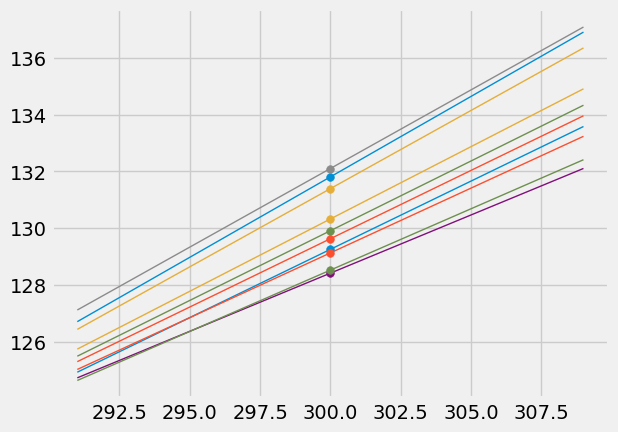

In [18]:
# Let's replot the lines above, but now for 3 points much closer together.
# that is, x = 291, 300, and 309 (increments by 9 on the x axis)
lines = Table(['slope','intercept', 'at 291', 'at 300', 'at 309'])

for i in range(10):
    resample = births.sample()
    a = slope(resample, 'Gestational Days', 'Birth Weight')
    b = intercept(resample, 'Gestational Days', 'Birth Weight')
    lines.append([a, b, a * 291 + b, a * 300 + b, a * 309 + b])

for i in np.arange(lines.num_rows):
    line = lines.row(i)
    plots.plot([291, 309], [line.item('at 291'), line.item('at 309')], lw=1)
    plots.scatter(300, line.item('at 300'), s=30, zorder=3)

In [ ]:
# Notice now, that we actually see a wider variability now that we have zoomed in

## Confidence Interval for Prediction ##

In [ ]:
# To determine how much variability we get for a prediction, 
# e.g., prediction of the baby's weight at the gestation period of 300 days,
# we obtain many predictions, by resampling the original sample
# then compute the 95% CI
# and visualize in an empirical histogram

In [19]:
# Let's put all the above steps in one function
def bootstrap_prediction(t, x, y, new_x, repetitions=1000):

    # Bootstrap the scatter, predict, collect
    predictions = make_array()
    for i in np.arange(repetitions):
        resample = t.sample()
        predicted_y = prediction_at(resample, x, y, new_x)
        predictions = np.append(predictions, predicted_y)

    # Find the ends of the approximate 95% prediction interval
    left = percentile(2.5, predictions)
    right = percentile(97.5, predictions)

    # Display results
    Table().with_column('Prediction', predictions).hist(bins=20)
    plots.xlabel('predictions at x='+str(new_x))
    plots.plot([left, right], [0, 0], color='yellow', lw=8);
    print('Approximate 95%-confidence interval for height of true line:')
    print(left, right, '(width =', right - left, ')') 

Approximate 95%-confidence interval for height of true line:
128.738713516 132.360769212 (width = 3.62205569622 )


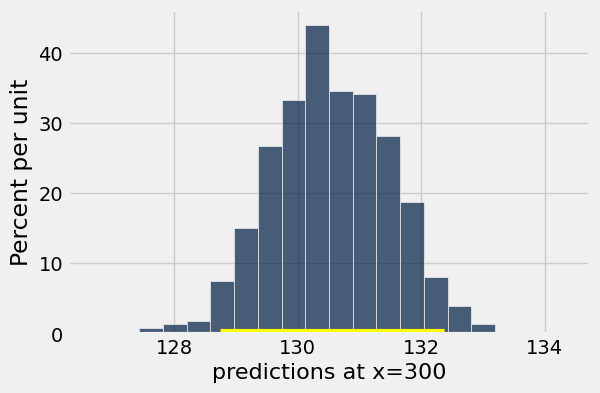

In [20]:
bootstrap_prediction(births, 'Gestational Days', 'Birth Weight', 300)

## Predictions at Different Values of X

In [ ]:
# How does the histogram change for different values of x?
# The intervals are wider for values of x that 
# are  further away from the mean of x

In [ ]:
# we'll call the function we created above, to:
# re-sample from the original sample, 
# generate predictions for a single value of x at each of these resamples
# compute the 95% CI
# and visualize the empirical histogram

# 1: x = 210
bootstrap_prediction(births, 'Gestational Days', 'Birth Weight', 210)

In [ ]:
# 2: x = 280
bootstrap_prediction(births, 'Gestational Days', 'Birth Weight', 280)

In [ ]:
# notice how much smaller the interval is at x=280

In [ ]:
# let's check how close 280 is at the mean of gestational days
np.mean(births.column('Gestational Days'))

## Inference for the Slope ##

In [ ]:
# Let's start by visualizing the dataset, alongside the regression line

In [ ]:
births.scatter('Gestational Days', 'Birth Weight', fit_line=True)

In [ ]:
# the trend seems to be positive upwards, let's compute the slope of the regression line
slope(births, 'Gestational Days', 'Birth Weight')

In [ ]:
# Now, we will repeat the bootstrapping process, 
# and plot a histogram of the values of slopes obtained for all the boostrap samples
# we will also show the 95% CI, and check whether our slope is within this range
def bootstrap_slope(t, x, y, repetitions=5000):
    
    # Bootstrap the scatter, find the slope, collect
    slopes = make_array()
    for i in np.arange(repetitions):
        bootstrap_sample = t.sample()
        bootstrap_slope = slope(bootstrap_sample, x, y)
        slopes = np.append(slopes, bootstrap_slope)
    
    # Find the endpoints of the 95% confidence interval for the true slope
    left = percentile(2.5, slopes)
    right = percentile(97.5, slopes)
    
    # Slope of the regression line from the original sample
    observed_slope = slope(t, x, y)
    
    # Display results
    Table().with_column('Bootstrap Slopes', slopes).hist(bins=20)
    plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=8);
    print('Slope of regression line:', observed_slope)
    print('Approximate 95%-confidence interval for the slope of the true line:')
    print(left, 'to', right)

In [ ]:
bootstrap_slope(births, 'Gestational Days', 'Birth Weight', 2500)

## Rain on the Regression Parade

In [ ]:
# what if the slope of the regression line is just by chance? 
# could the true slope be zero?

# Let's simulate a true line having a slope of zero,
# generate points around it,
# the fit a regression line across those points.
 
# Our goal is to see whether our regression line shows a slope that is not 0.

In [ ]:
# We will call the function draw_and_compare 
# that we used in our previous simulation, 
# this time requiring the true line to have slope 0.

draw_and_compare(0, 10, 25) # arguments are: slope, intercept, and number of points 

## Testing whether the slope is real, i.e., slope is not zero

To decide whether or not the slope that we are seeing is real, we would like to test the following hypotheses:

**Null Hypothesis.** Slope of true line = 0.

**Alternative Hypothesis.** Slope of true line is not 0.

In [ ]:
# Let's start by computing the slope
# this time we are looking at the relationship 
# between maternal age and baby's birth weight

slope(births, 'Maternal Age', 'Birth Weight')

In [ ]:
# let's visualize the data and the regression line
births.scatter('Maternal Age', 'Birth Weight', fit_line=True)

In [ ]:
# now let's call the boostrap_slope function we created, to:
# generate slopes for various bootstrap samples
# compute the 95% CI
# and visualize it alongside slope values for all bootstrap samples in an empirical histogram

bootstrap_slope(births, 'Maternal Age', 'Birth Weight', 2500)

In [ ]:
# so, do we reject the null hypothesis or not?